<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import torch
import torch

# Setup device agnostic code
# import argparse

# parser = argparse.ArgumentParser(description='PyTorch Example')
# parser.add_argument('--disable-cuda', action='store_true',
#                     help='Disable CUDA')
# args = parser.parse_args()
# args.device = None
# if not args.disable_cuda and torch.cuda.is_available():
#     args.device = torch.device('cuda')
# else:
#     args.device = torch.device('cpu')

# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors. 
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [2]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

n_samples = 500
noise = .1

X_moon, y_moon = make_moons(n_samples = n_samples, noise=noise, random_state=RANDOM_SEED, shuffle=True)


In [3]:
# Turn data into a DataFrame
import pandas as pd

pd.DataFrame({"X1": X_moon[:, 0], "X2": X_moon[:, 1], "label": y_moon})

,X1,X2,label
0,0.830676,-0.409936,1
1,0.798355,0.837612,0
2,1.050468,-0.485162,1
3,-0.258143,0.980008,0
4,0.330682,1.147633,0
...,...,...,...
495,0.248210,0.998040,0
496,0.112622,0.119335,1
497,0.508698,-0.286530,1
498,1.547606,-0.344769,1


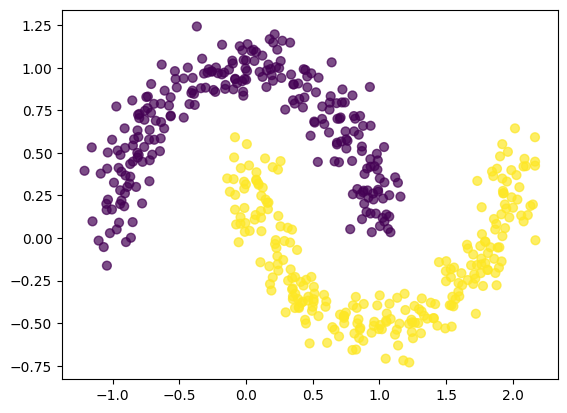

In [4]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, s=40, alpha=.7);

In [5]:
# Turn data into tensors of dtype float
X_moon, y_moon = torch.from_numpy(X_moon).type(torch.float), torch.from_numpy(y_moon).type(torch.float)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

test_size = .3

X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moon, y_moon, test_size=.3, random_state=RANDOM_SEED)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [6]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    def __init__(self, in_features=2, n_class=2, hidden_units=5):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=in_features, out_features=hidden_units)
        self.layer_2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.layer_3 = nn.Linear(in_features=hidden_units, out_features=n_class)
        self.relu = nn.ReLU()
    

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        return self.layer_3(x)

# Instantiate the model
## Your code here ##

model = MoonModelV0()
model

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=2, bias=True)
  (relu): ReLU()
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [7]:
learning_rate = .03

# Setup loss function
loss_fn = nn.CrossEntropyLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [8]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
## Your code here ##
y_logits = model(X_moon_test[:5])
print(y_logits)

# Prediction probabilities
print("Pred probs:")
## Your code here ##
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs)

# Prediction labels
print("Pred labels:")
## Your code here ##
y_pred = y_pred_probs.argmax(dim=1)
print(y_pred)

Logits:
tensor([[0.0934, 0.3055],
        [0.0983, 0.3102],
        [0.0964, 0.3089],
        [0.0533, 0.3557],
        [0.0654, 0.3018]], grad_fn=<AddmmBackward0>)
Pred probs:
tensor([[0.4472, 0.5528],
        [0.4472, 0.5528],
        [0.4471, 0.5529],
        [0.4250, 0.5750],
        [0.4412, 0.5588]], grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([1, 1, 1, 1, 1])


In [9]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
try:
    from torchmetrics import Accuracy
except:
    !pip -q install torchmetrics
    from torchmetrics import Accuracy
    
## TODO: Uncomment this code to use the Accuracy function
# acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
# acc_fn

acc_fn = Accuracy(task='multiclass', num_classes=2)
acc_fn(y_pred, y_moon_test[:5])

ERROR: Invalid requirement: '#'
C:\Users\ADMIN\anaconda3\envs\DSCoursera\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


tensor(1.)

In [18]:
## TODO: Uncomment this to set the seed
# torch.manual_seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 2000
  # if epoch % 100 == 0:
y_train = y_moon_train.type(torch.long)
y_test = y_moon_test.type(torch.long)
    
train_loss = []
test_loss = []
train_acc = []
test_acc = []

for epoch in range(epochs + 1):
    model.train()
    
    y_logits = model(X_moon_train)
    y_prob_pred = torch.softmax(y_logits, dim=1)
    y_pred = y_prob_pred.argmax(dim=1)
    
    loss_train = loss_fn(y_prob_pred, y_train)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        acc_train = acc_fn(y_pred, y_train) 

        y_logits_test = model(X_moon_test)
        y_prob_pred_test = torch.softmax(y_logits_test, dim=1)
        y_pred_test= y_prob_pred_test.argmax(dim=1)

        loss_test = loss_fn(y_prob_pred_test, y_test)
        acc_test = acc_fn(y_pred_test, y_test)
        train_loss.append(loss_train)
        test_loss.append(loss_test)
        train_acc.append(acc_train)
        test_acc.append(acc_test)

    if epoch % 50 == 0:
        print(f"Epoch {epoch} | Loss train {loss_train:.4f}, Accuracy train {acc_train:.4f} | Loss test {loss_test:.4f}, Accuracy test {acc_test:.4f}")
        
        
        
    
# Send data to the device


# Loop through the data
# for epoch in range(epochs):
  ### Training
  

  # 1. Forward pass (logits output)
  
  # Turn logits into prediction probabilities
  

  # Turn prediction probabilities into prediction labels
  

  # 2. Calculaute the loss
  # loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  # acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
  

  ### Testing
  # model_0.eval() 
  # with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    
    # Turn the test logits into prediction labels
    

    # 2. Caculate the test loss/acc
    
  # Print out what's happening every 100 epochs

Epoch 0 | Loss train 0.4098, Accuracy train 0.9000 | Loss test 0.4031, Accuracy test 0.9200
Epoch 50 | Loss train 0.4086, Accuracy train 0.9000 | Loss test 0.4019, Accuracy test 0.9200
Epoch 100 | Loss train 0.4073, Accuracy train 0.9000 | Loss test 0.4006, Accuracy test 0.9200
Epoch 150 | Loss train 0.4059, Accuracy train 0.9057 | Loss test 0.3992, Accuracy test 0.9200
Epoch 200 | Loss train 0.4042, Accuracy train 0.9086 | Loss test 0.3977, Accuracy test 0.9267
Epoch 250 | Loss train 0.4018, Accuracy train 0.9143 | Loss test 0.3958, Accuracy test 0.9333
Epoch 300 | Loss train 0.3988, Accuracy train 0.9200 | Loss test 0.3934, Accuracy test 0.9333
Epoch 350 | Loss train 0.3954, Accuracy train 0.9257 | Loss test 0.3906, Accuracy test 0.9467
Epoch 400 | Loss train 0.3919, Accuracy train 0.9314 | Loss test 0.3878, Accuracy test 0.9467
Epoch 450 | Loss train 0.3886, Accuracy train 0.9314 | Loss test 0.3848, Accuracy test 0.9467
Epoch 500 | Loss train 0.3858, Accuracy train 0.9400 | Loss tes

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [13]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                         np.arange(y_min, y_max, .1))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
#     if len(torch.unique(y)) > 2:
#         y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
#     else: 
#         y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

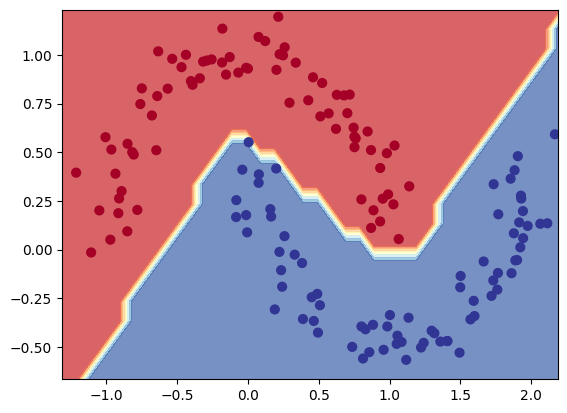

In [19]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model, X_moon_test, y_moon_test)

In [ ]:
torch.softmax(model(X_moon_train), dim=1).argmax(dim=1).shape

In [46]:
with torch.inference_mode():
    y_pred = model(X_moon_test)
    
y_pred.shape

torch.Size([150, 2])

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [25]:
# Create a straight line tensor

x = torch.arange(-5, 5, .01)
y = x


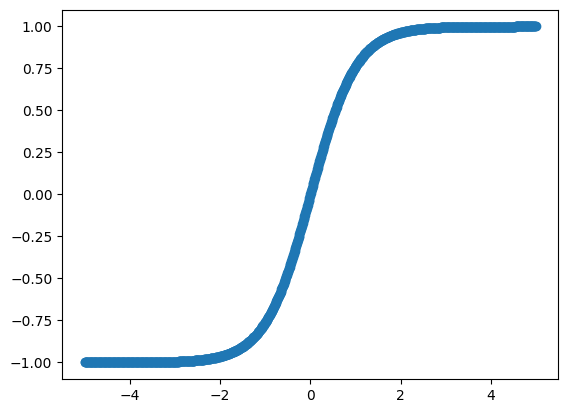

In [26]:
# Test torch.tanh() on the tensor and plot it
plt.scatter(x, torch.tanh(x))

In [15]:
# Replicate torch.tanh() and plot it


## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

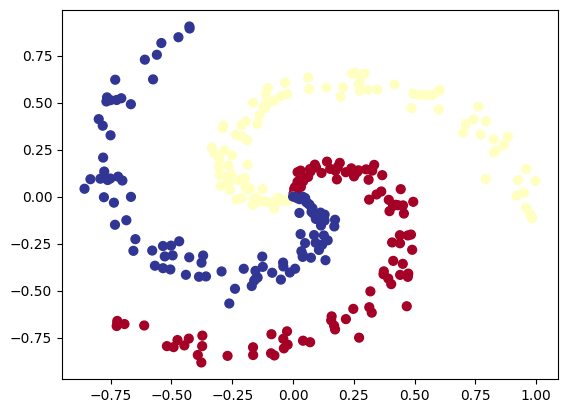

In [77]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [78]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split


In [79]:
# Let's calculuate the accuracy for when we fit our model
try:
    from torchmetrics import Accuracy
except:
    !pip -q install torchmetrics
    from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4)
acc_fn

MulticlassAccuracy()

In [80]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
import argparse

parser = argparse.ArgumentParser(
                    prog='ProgramName',
                    description='What is the CUDA available')
    
parser.add_argument("--device",action="store_true")

# Create model by subclassing nn.Module
class ClassifierModelV1(nn.Module):
    def __init__(self, in_features = 2, n_class = 4, hidden_units=5):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=in_features, out_features=hidden_units)
        self.layer_2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.layer_3 = nn.Linear(in_features=hidden_units, out_features=n_class)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        X = self.relu(self.layer_1(X))
        X = self.relu(self.layer_2(X))
        
        return self.layer_3(X)
# Instantiate model and send it to device
model_1 = ClassifierModelV1(in_features = 2, n_class = 3, hidden_units = 10)
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.2229,  0.6807],
                      [ 0.1188,  0.6932],
                      [ 0.1383,  0.4084],
                      [ 0.5669,  0.5911],
                      [-0.3958,  0.6501],
                      [ 0.4283, -0.3306],
                      [-0.3374, -0.5931],
                      [ 0.1776, -0.5731],
                      [ 0.2987,  0.2233],
                      [-0.6143,  0.1927]])),
             ('layer_1.bias',
              tensor([-0.0575,  0.3230,  0.4057, -0.7030,  0.6485,  0.5930,  0.2813, -0.6463,
                      -0.2526, -0.2049])),
             ('layer_2.weight',
              tensor([[-0.0813,  0.1783,  0.1150,  0.2505, -0.1184,  0.1064,  0.1125, -0.2633,
                       -0.3067, -0.1641],
                      [ 0.2165, -0.2977, -0.2753,  0.1772,  0.1706,  0.2601, -0.2387, -0.2314,
                        0.1622,  0.2750],
                      [ 0.1892,  0.0495,  0.1042,  0.3001, -0.2040, -0.1

In [81]:
# Setup data to be device agnostic


# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
## Your code here ##
y_logits = model_1(X[:5])
print(y_logits)


print("Pred probs:")
## Your code here ##
y_pred_prob = torch.softmax(y_logits, dim=1)
print(y_pred_prob)

print("Pred labels:")
## Your code here ##
y_pred = y_pred_prob.argmax(dim=1)
print(y_pred)

Logits:
tensor([[ 0.1053, -0.2706,  0.2986],
        [ 0.1051, -0.2698,  0.2991],
        [ 0.1051, -0.2693,  0.2995],
        [ 0.1053, -0.2690,  0.2996],
        [ 0.1047, -0.2677,  0.3005]], grad_fn=<AddmmBackward0>)
Pred probs:
tensor([[0.3448, 0.2368, 0.4184],
        [0.3446, 0.2369, 0.4185],
        [0.3446, 0.2370, 0.4185],
        [0.3446, 0.2370, 0.4185],
        [0.3442, 0.2372, 0.4186]], grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([2, 2, 2, 2, 2])


In [82]:
# Setup loss function and optimizer
loss_fn_1 = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=learning_rate)

In [83]:
test_size = .3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RANDOM_SEED, shuffle=True)


train_loss = []
test_loss = []
train_acc = []
test_acc = []

In [91]:
# Build a training loop for the model
epochs = 5000


# Loop over data
for epoch in range(epochs + 1):

    ## Training
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train)
    y_pred_prob = torch.softmax(y_logits, dim=1)
    y_pred = y_pred_prob.argmax(dim=1)
    
    # 2. Calculate the loss
    loss_train = loss_fn_1(y_pred_prob, y_train)

    # 3. Optimizer zero grad
    optimizer_1.zero_grad()

    # 4. Loss backward
    loss_train.backward()

    # 5. Optimizer step
    optimizer_1.step()

    ## Testing
    model_1.eval()
    with torch.inference_mode():        
        # 1. Forward pass
        y_logits_test = model_1(X_test)
        y_prob_test = torch.softmax(y_logits_test, dim = 1)
        y_pred_test = y_prob_test.argmax(dim=1)
        # 2. Caculate loss and acc
        loss_test = loss_fn_1(y_prob_test, y_test)
        acc_train = acc_fn(y_pred, y_train)
        acc_test = acc_fn(y_pred_test, y_test)
        
        # Print out what's happening every 100 epochs
        if epoch % 20 == 0:
            print(f"Epoch {epoch} | Loss train {loss_train:.4f}, Accuracy train {acc_train:.4f} | Loss test {loss_test:.4f}, Accuracy test {acc_test:.4f}")
            
            train_loss.append(loss_train)
            test_loss.append(loss_test)
            train_acc.append(acc_train)
            test_acc.append(acc_test)

Epoch 0 | Loss train 0.6882, Accuracy train 0.8905 | Loss test 0.6635, Accuracy test 0.9111
Epoch 20 | Loss train 0.6880, Accuracy train 0.8905 | Loss test 0.6631, Accuracy test 0.9111
Epoch 40 | Loss train 0.6878, Accuracy train 0.8905 | Loss test 0.6627, Accuracy test 0.9111
Epoch 60 | Loss train 0.6875, Accuracy train 0.8905 | Loss test 0.6623, Accuracy test 0.9111
Epoch 80 | Loss train 0.6873, Accuracy train 0.8952 | Loss test 0.6618, Accuracy test 0.9111
Epoch 100 | Loss train 0.6871, Accuracy train 0.8952 | Loss test 0.6613, Accuracy test 0.9111
Epoch 120 | Loss train 0.6868, Accuracy train 0.8952 | Loss test 0.6609, Accuracy test 0.9111
Epoch 140 | Loss train 0.6866, Accuracy train 0.8952 | Loss test 0.6605, Accuracy test 0.9111
Epoch 160 | Loss train 0.6864, Accuracy train 0.8952 | Loss test 0.6601, Accuracy test 0.9111
Epoch 180 | Loss train 0.6862, Accuracy train 0.8952 | Loss test 0.6597, Accuracy test 0.9111
Epoch 200 | Loss train 0.6860, Accuracy train 0.8952 | Loss test 0

Epoch 1840 | Loss train 0.6741, Accuracy train 0.8905 | Loss test 0.6412, Accuracy test 0.9444
Epoch 1860 | Loss train 0.6740, Accuracy train 0.8905 | Loss test 0.6410, Accuracy test 0.9444
Epoch 1880 | Loss train 0.6739, Accuracy train 0.8905 | Loss test 0.6408, Accuracy test 0.9444
Epoch 1900 | Loss train 0.6738, Accuracy train 0.8905 | Loss test 0.6406, Accuracy test 0.9444
Epoch 1920 | Loss train 0.6736, Accuracy train 0.8905 | Loss test 0.6405, Accuracy test 0.9444
Epoch 1940 | Loss train 0.6735, Accuracy train 0.8905 | Loss test 0.6403, Accuracy test 0.9444
Epoch 1960 | Loss train 0.6734, Accuracy train 0.8905 | Loss test 0.6401, Accuracy test 0.9444
Epoch 1980 | Loss train 0.6733, Accuracy train 0.8905 | Loss test 0.6399, Accuracy test 0.9444
Epoch 2000 | Loss train 0.6732, Accuracy train 0.8905 | Loss test 0.6397, Accuracy test 0.9444
Epoch 2020 | Loss train 0.6731, Accuracy train 0.8905 | Loss test 0.6396, Accuracy test 0.9444
Epoch 2040 | Loss train 0.6730, Accuracy train 0.8

Epoch 3600 | Loss train 0.6661, Accuracy train 0.8952 | Loss test 0.6300, Accuracy test 0.9444
Epoch 3620 | Loss train 0.6660, Accuracy train 0.8952 | Loss test 0.6299, Accuracy test 0.9444
Epoch 3640 | Loss train 0.6659, Accuracy train 0.8952 | Loss test 0.6299, Accuracy test 0.9444
Epoch 3660 | Loss train 0.6659, Accuracy train 0.8952 | Loss test 0.6298, Accuracy test 0.9444
Epoch 3680 | Loss train 0.6658, Accuracy train 0.8952 | Loss test 0.6297, Accuracy test 0.9444
Epoch 3700 | Loss train 0.6657, Accuracy train 0.8952 | Loss test 0.6297, Accuracy test 0.9444
Epoch 3720 | Loss train 0.6656, Accuracy train 0.8952 | Loss test 0.6296, Accuracy test 0.9444
Epoch 3740 | Loss train 0.6656, Accuracy train 0.8952 | Loss test 0.6295, Accuracy test 0.9444
Epoch 3760 | Loss train 0.6655, Accuracy train 0.8952 | Loss test 0.6294, Accuracy test 0.9444
Epoch 3780 | Loss train 0.6654, Accuracy train 0.8952 | Loss test 0.6293, Accuracy test 0.9444
Epoch 3800 | Loss train 0.6654, Accuracy train 0.8

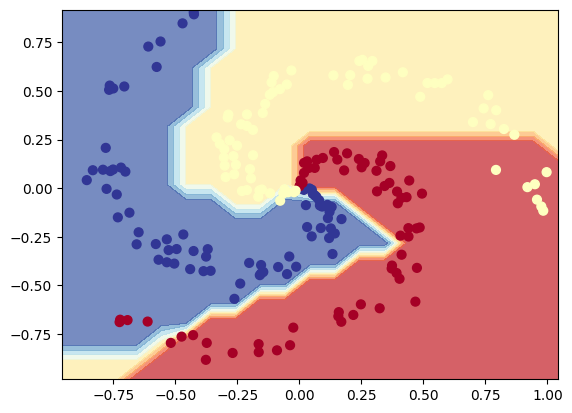

In [93]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model_1, X_train, y_train)

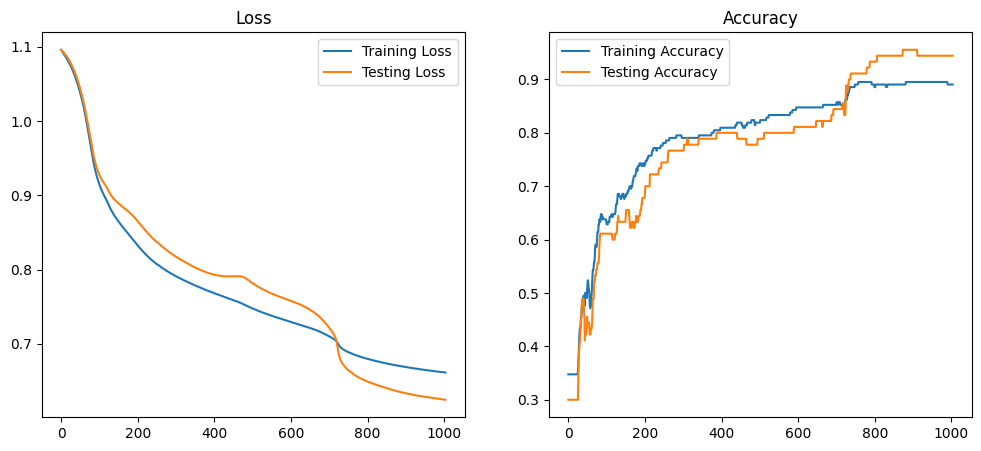

In [95]:
range_epochs = range(len(train_loss))

with torch.inference_mode():
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range_epochs, train_loss, label="Training Loss")
    plt.plot(range_epochs, test_loss, label="Testing Loss")
    plt.legend()
    plt.title("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(range_epochs, train_acc, label="Training Accuracy")
    plt.plot(range_epochs, test_acc, label="Testing Accuracy")
    plt.legend()
    plt.title("Accuracy")